In [83]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [84]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"

# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
tags = ["2024-05-03-14-02-27"]
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [85]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]

ncols, nrows = df["ncols"][0], 6
df

100%|██████████| 12/12 [00:00<00:00, 35797.76it/s]


,_timestamp,Evaluation/Discounted_Returns,Evaluation/Mean_Returns,Evaluation/Mean_Discounted_Returns,trajectories,Evaluation/Entropies,Evaluation/Returns,Evaluation/Mean_Entropy,_step,_runtime,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,1.714739e+09,"{'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-15.97,-15.97,"[[60, 48, 49, 37, 38, 39, 40, 41, 42, 43, 44, ...","{'bins': [0.21459925174713135, 0.2182832807302...","{'bins': [-21, -20.875, -20.75, -20.625, -20.5...",0.338921,0,158.437362,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
1,1.714738e+09,"{'bins': [-22, -21.890625, -21.78125, -21.6718...",-17.49,-17.49,"[[60, 48, 49, 50, 51, 52, 53, 54, 42, 43, 44, ...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0...","{'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0...",0.612779,0,94.266978,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
2,1.714738e+09,"{'bins': [-74, -73.140625, -72.28125, -71.4218...",-31.57,-31.57,"[[60, 48, 36, 24, 24, 24, 24, 25, 24, 24, 25, ...","{'_type': 'histogram', 'bins': [0.664069533348...","{'_type': 'histogram', 'bins': [-74, -73.14062...",0.762713,0,154.451052,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
3,1.714738e+09,"{'values': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...",-15.96,-15.96,"[[60, 48, 48, 49, 50, 38, 39, 40, 41, 42, 43, ...","{'_type': 'histogram', 'bins': [0.305838525295...","{'_type': 'histogram', 'bins': [-23, -22.84375...",0.400783,0,67.849240,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
4,1.714738e+09,"{'bins': [-21, -20.90625, -20.8125, -20.71875,...",-17.08,-17.08,"[[60, 48, 49, 50, 51, 39, 27, 28, 29, 30, 31, ...","{'bins': [0.4488554894924164, 0.45306667685508...","{'_type': 'histogram', 'bins': [-21, -20.90625...",0.603175,0,49.263160,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
5,1.714738e+09,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-23.74,-23.74,"[[60, 48, 36, 36, 24, 25, 26, 27, 28, 29, 30, ...","{'_type': 'histogram', 'bins': [0.721941888332...","{'bins': [-48, -47.515625, -47.03125, -46.5468...",0.788904,0,66.085333,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
6,1.714738e+09,"{'_type': 'histogram', 'bins': [-23, -22.84375...",-16.15,-16.15,"[[60, 48, 49, 50, 51, 39, 40, 41, 42, 43, 44, ...","{'_type': 'histogram', 'bins': [0.338806480169...","{'_type': 'histogram', 'bins': [-23, -22.84375...",0.454947,0,30.494259,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity
7,1.714738e+09,"{'bins': [-25, -24.84375, -24.6875, -24.53125,...",-17.00,-17.00,"[[60, 48, 48, 49, 50, 38, 39, 40, 41, 42, 43, ...","{'values': [1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1...","{'_type': 'histogram', 'bins': [-25, -24.84375...",0.579974,0,26.914781,...,0.3,4,identity,coordinate,0.000001,UCT,6,mvc,15,identity
8,1.714738e+09,"{'values': [1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0...",-22.40,-22.40,"[[60, 48, 36, 37, 38, 39, 40, 28, 29, 30, 31, ...","{'values': [1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1...","{'_type': 'histogram', 'bins': [-37, -36.67187...",0.828568,0,32.324577,...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
9,1.714738e+09,"{'_type': 'histogram', 'bins': [-22, -21.85937...",-16.49,-16.49,"[[60, 48, 49, 50, 49, 50, 38, 39, 40, 41, 42, ...","{'bins': [0.34886419773101807, 0.3526825010776...","{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.490224,0,17.218736,...,0.3,4,identity,coordinate,0.000001,PolicyUCT,6,mvc,15,identity


In [86]:
# filter out 128 planning budget
# Assuming 'df' is your DataFrame
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

# Group the DataFrame by both 'policy_combination' and 'planning_budget'
grouped = df.groupby(['policy_combination', 'planning_budget'])['trajectories']


# Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()
aggregated_trajectories


policy_combination  planning_budget
mvc+PolicyUCT       16                 [[60, 48, 49, 50, 49, 50, 38, 39, 40, 41, 42, ...
                    32                 [[60, 48, 49, 50, 51, 39, 40, 41, 42, 43, 44, ...
                    64                 [[60, 48, 48, 49, 50, 38, 39, 40, 41, 42, 43, ...
                    128                [[60, 48, 49, 37, 38, 39, 40, 41, 42, 43, 44, ...
mvc+UCT             16                 [[60, 48, 49, 50, 38, 39, 40, 41, 42, 43, 44, ...
                    32                 [[60, 48, 48, 49, 50, 38, 39, 40, 41, 42, 43, ...
                    64                 [[60, 48, 49, 50, 51, 39, 27, 28, 29, 30, 31, ...
                    128                [[60, 48, 49, 50, 51, 52, 53, 54, 42, 43, 44, ...
visit+UCT           16                 [[60, 48, 60, 48, 48, 49, 37, 38, 39, 40, 41, ...
                    32                 [[60, 48, 36, 37, 38, 39, 40, 28, 29, 30, 31, ...
                    64                 [[60, 48, 36, 36, 24, 25, 26, 27, 2

In [87]:
# remove all trajectories with a length of 100
print(aggregated_trajectories.apply(lambda x: len(x)).sum())
filtered_aggregated_trajectories = aggregated_trajectories.apply(lambda x: [traj for traj in x if len(traj) != 100])
# check the total number of trajectories
filtered_aggregated_trajectories.apply(lambda x: len(x)).sum()

1200


1200

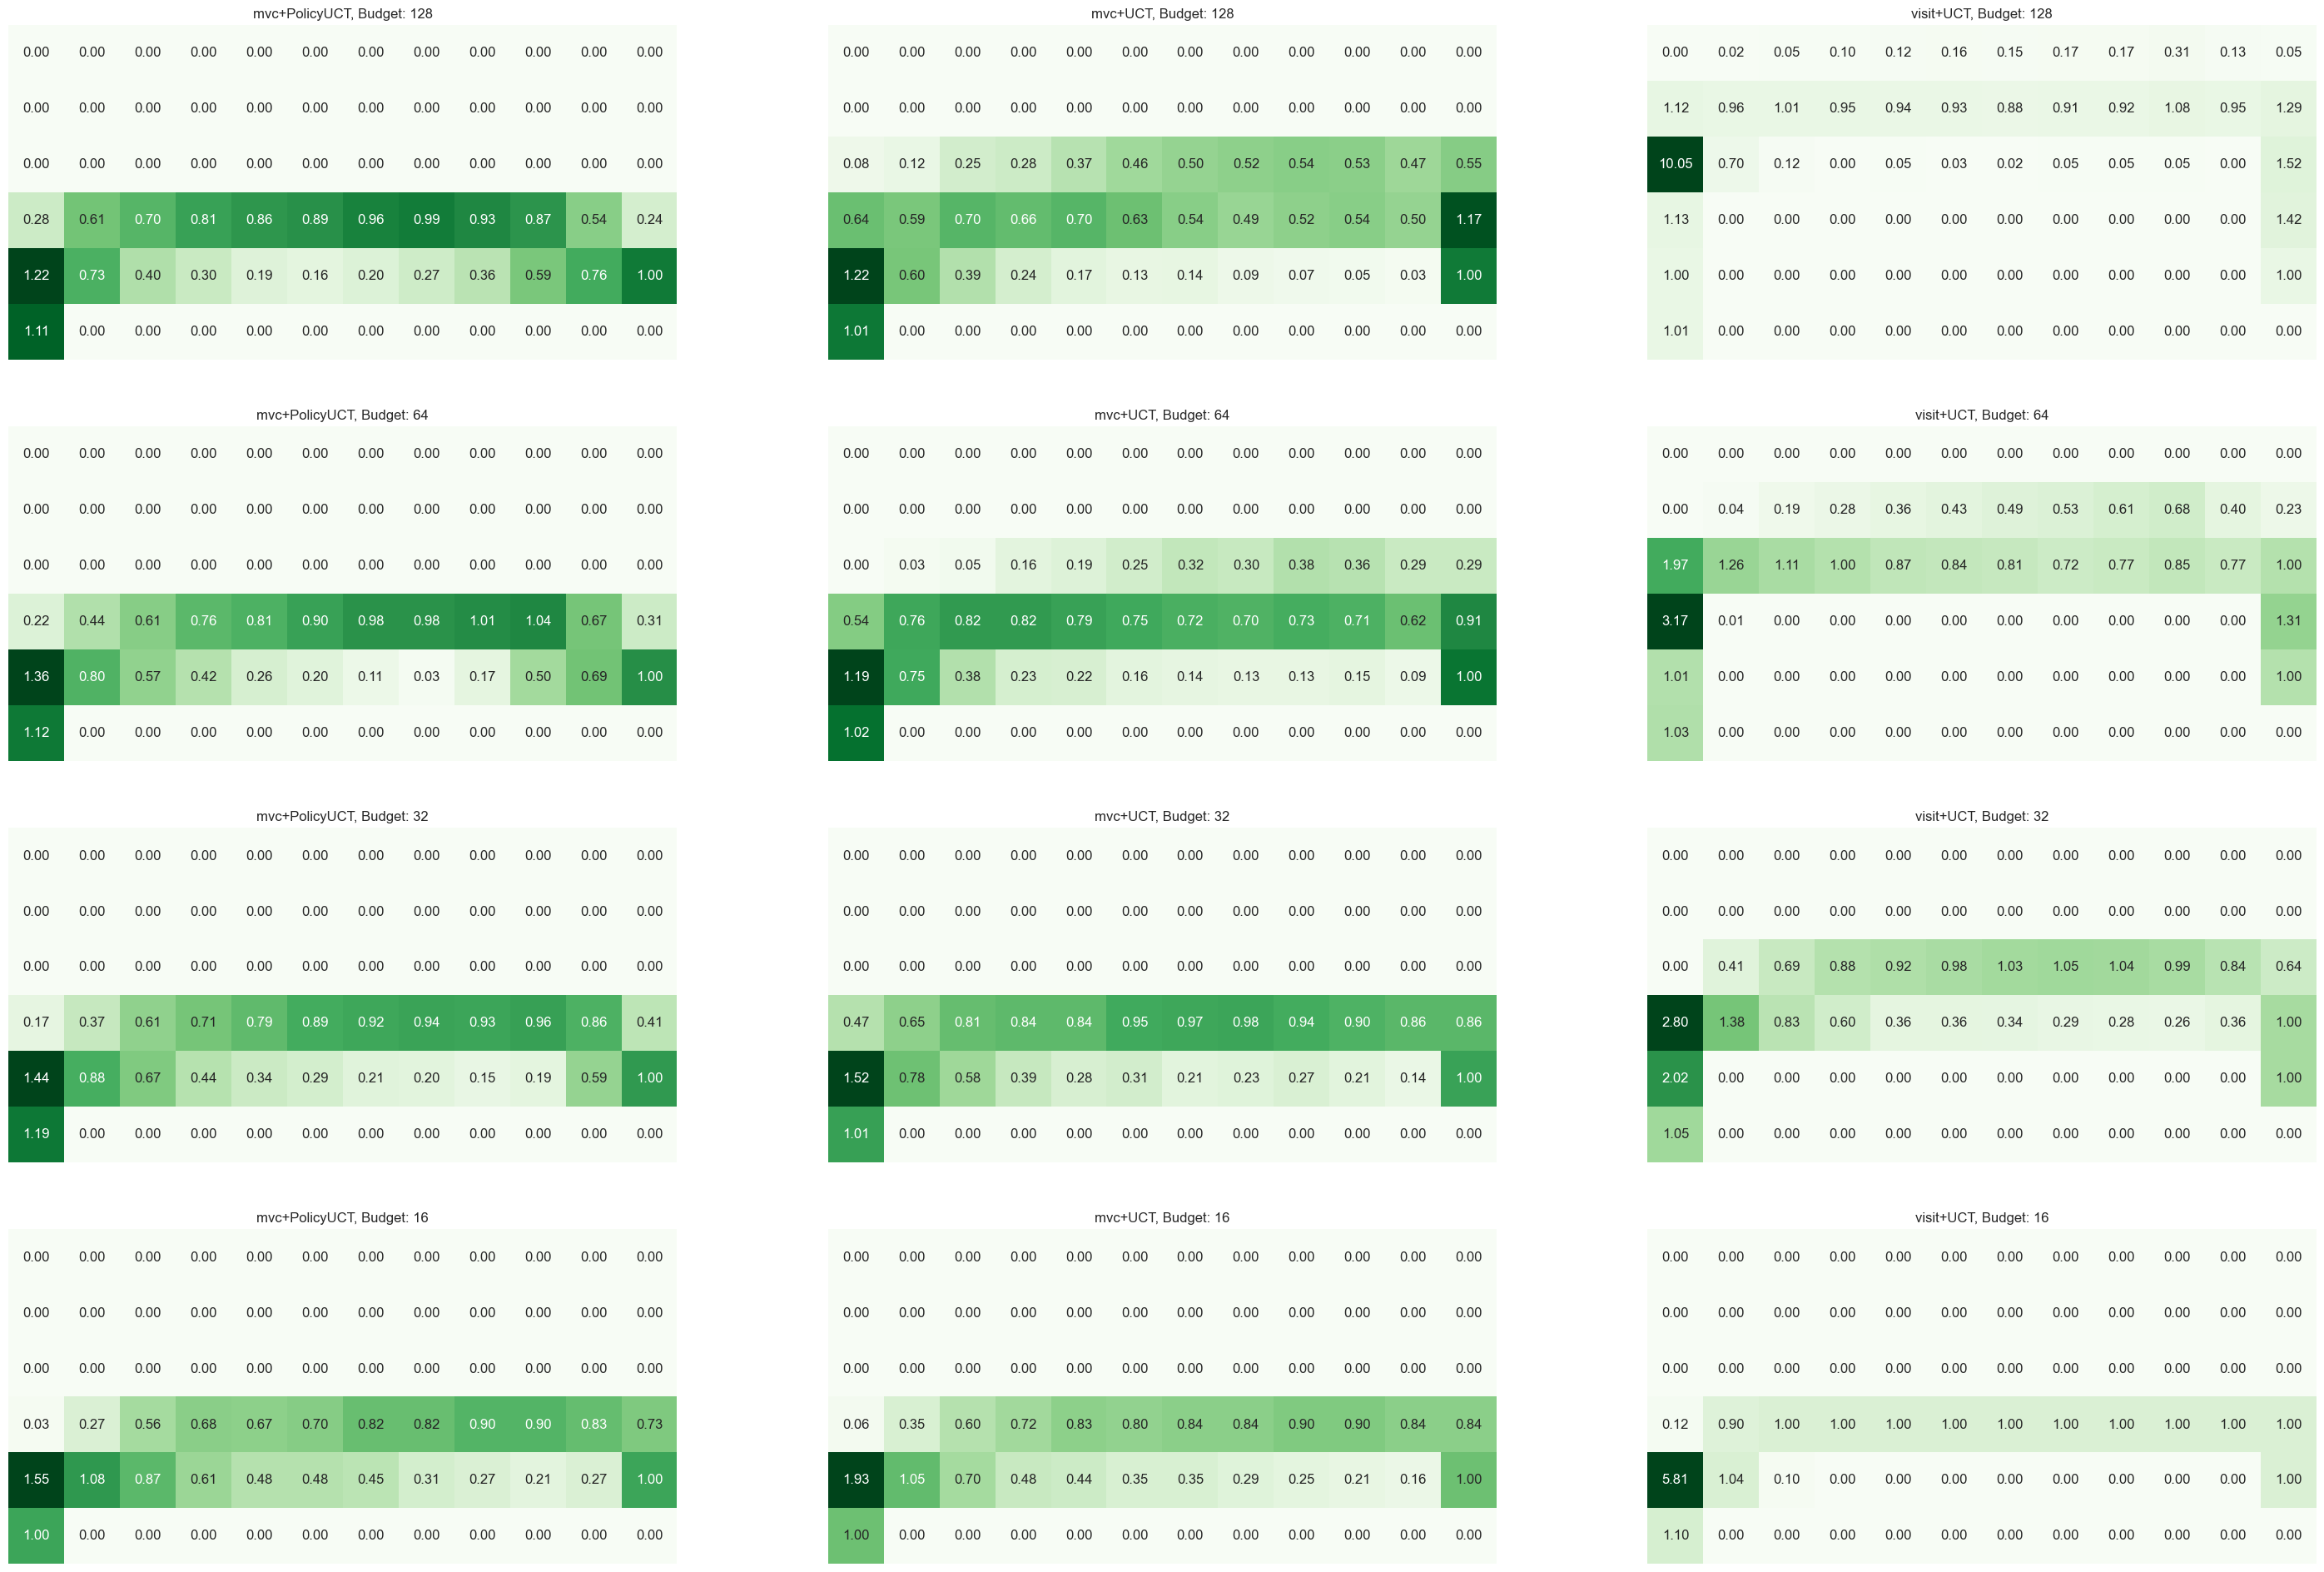

In [88]:
# Define functions to calculate coordinates and density
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density

# Determine the number of unique policy combinations and planning budgets
n_policies = len(df['policy_combination'].unique())
n_budgets = len(df['planning_budget'].unique())

# Prepare the plot
fig, axs = plt.subplots(n_budgets, n_policies, figsize=(ncols * n_policies, nrows * n_budgets))

# Plot each subgroup
for (policy_combination, planning_budget), trajectories in filtered_aggregated_trajectories.items():
    i = df['planning_budget'].unique().tolist().index(planning_budget)
    j = df['policy_combination'].unique().tolist().index(policy_combination)
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    ax = axs[i][j] if n_budgets > 1 and n_policies > 1 else axs
    sns.heatmap(density, ax=ax, cmap='Greens', cbar=False, annot=True, fmt='.2f')
    ax.set_xticks(range(ncols))
    ax.set_yticks(range(nrows))
    ax.set_aspect('equal')  # Set aspect ratio to be equal, making each cell square
    # set subtitle
    ax.set_title(f"{policy_combination}, Budget: {planning_budget}")



plt.show()


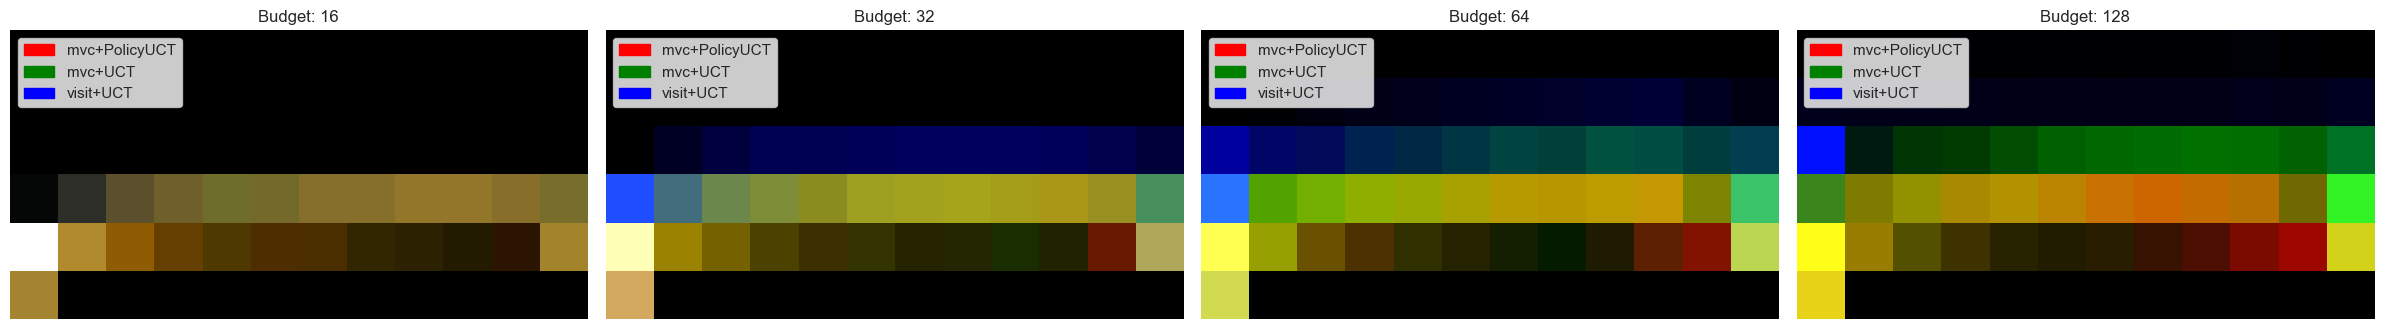

In [89]:
import matplotlib.patches as mpatches
grouped = df.groupby(['planning_budget', 'policy_combination'])['trajectories'].sum()


# Determine the number of unique planning budgets
n_budgets = len(grouped.index.get_level_values(0).unique())

# Prepare a single figure with multiple subplots (one for each planning_budget)
fig, axs = plt.subplots(1, n_budgets, figsize=(6 * n_budgets, 6))

# Iterate over each planning_budget and create RGB heatmaps
for idx, (planning_budget, budget_group) in enumerate(grouped.groupby(level=0)):
    rgb_image = np.zeros((nrows, ncols, 3))  # Initialize RGB layers
    colors = ['Red', 'Green', 'Blue']  # Map trajos keys to RGB channels
    channel_colors = {name: color for name, color in zip(budget_group.index.get_level_values(1), colors)}

    # Compute density for each policy combination and assign to RGB channels
    for jdx, ((_, policy_combination), trajectories) in enumerate(budget_group.items()):
        density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
        norm_density = density / np.max(density, where=(density!=0), initial=1)  # Normalize avoiding division by zero
        rgb_image[:, :, jdx % 3] += norm_density  # Accumulate in RGB layers, repeating colors if more than 3 policies

    ax = axs[idx] if n_budgets > 1 else axs
    ax.imshow(rgb_image, aspect='equal')
    ax.axis('off')  # Hide grid lines and labels

    # Create a legend
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
    ax.legend(handles=legend_patches, loc='upper left')
    ax.set_title(f"Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/dist_training_cliff_rgb.pdf")
plt.show()

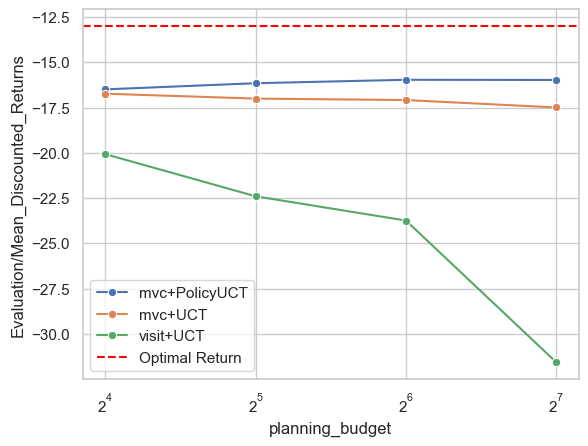

In [90]:
# plot Evaluation/Mean_Discounted_Returns from df vs planning_budget for each policy_combination

sns.lineplot(data=df, x='planning_budget', y='Evaluation/Mean_Discounted_Returns', hue='policy_combination', marker='o')
optimal_value = -13
plt.axhline(optimal_value, color='red', linestyle='--', label='Optimal Return')
# set x axis to log2 scale
plt.xscale('log', base=2)
plt.legend()
plt.show()
